In [30]:
import numpy as np
import pandas as pd
import torch
import torchvision as tv
import re
import time
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import Module, GRU, Embedding, Linear, Sigmoid, CrossEntropyLoss, ReLU, Tanh, Sequential
from torch import nn
from torchvision import transforms
import torch.optim as optim
from torchvision.utils import make_grid, save_image
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm
matplotlib.style.use('ggplot')

In [31]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [32]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

In [33]:
fmnist = datasets.FashionMNIST(root='./', train=True, download=True, transform=transform)
data_loader = DataLoader(fmnist, batch_size=batch_size, shuffle=True)

In [34]:
class Discriminator(Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = Sequential(
            Linear(self.n_input, 1024),
            ReLU(),
            Linear(1024, 512),
            ReLU(),
            Linear(512, 10)
        )
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.main(x)
        return nn.functional.log_softmax(x, dim=1)
        

In [35]:
discriminator = Discriminator().to(device)

In [36]:
optim_d = optim.Adam(discriminator.parameters(), lr=0.00005)

In [37]:
criterion = nn.CrossEntropyLoss()

In [38]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [39]:
# function to train the discriminator network
def train_discriminator(optimizer, data, labels):
    optimizer.zero_grad()
    output = discriminator(data)
    # print(output.shape)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    return loss, output

In [29]:
losses = []
accuracies = []
epochs = 50

for epoch in range(epochs):
    total = 0
    acc_loss = 0
    correct = 0
    for bi, (images, labels) in enumerate(data_loader):
        loss, output = train_discriminator(optim_d, images, labels)
        acc_loss += loss
        b_size = len(labels)
        total += b_size
        predicted = torch.argmax(output, dim=1)
        correct += (predicted==labels).sum()
        accuracy = correct/total
        avg_loss = loss/b_size
        if bi%20==0:
            print(f"Epoch {epoch}/{epochs}; Batch {bi}: Loss = {loss:.5f}\t\tAccuracy = {accuracy:.5f}")

    
    losses.append(acc_loss/total)
    accuracies.append(accuracy)


Epoch 0/50; Batch 0: Loss = 0.00451		Accuracy = 0.11328
Epoch 0/50; Batch 20: Loss = 0.00361		Accuracy = 0.46931
Epoch 0/50; Batch 40: Loss = 0.00243		Accuracy = 0.56050
Epoch 0/50; Batch 60: Loss = 0.00179		Accuracy = 0.60918
Epoch 0/50; Batch 80: Loss = 0.00143		Accuracy = 0.64222
Epoch 0/50; Batch 100: Loss = 0.00124		Accuracy = 0.66453
Epoch 1/50; Batch 0: Loss = 0.00121		Accuracy = 0.76758
Epoch 1/50; Batch 20: Loss = 0.00105		Accuracy = 0.78181
Epoch 1/50; Batch 40: Loss = 0.00116		Accuracy = 0.78549
Epoch 1/50; Batch 60: Loss = 0.00108		Accuracy = 0.78874
Epoch 1/50; Batch 80: Loss = 0.00101		Accuracy = 0.79521
Epoch 1/50; Batch 100: Loss = 0.00098		Accuracy = 0.79765
Epoch 2/50; Batch 0: Loss = 0.00093		Accuracy = 0.84180
Epoch 2/50; Batch 20: Loss = 0.00102		Accuracy = 0.82366
Epoch 2/50; Batch 40: Loss = 0.00107		Accuracy = 0.82031
Epoch 2/50; Batch 60: Loss = 0.00087		Accuracy = 0.82271
Epoch 2/50; Batch 80: Loss = 0.00095		Accuracy = 0.82393
Epoch 2/50; Batch 100: Loss = 0.

KeyboardInterrupt: 

In [53]:
losses0 = [i.detach() for i in losses]

No handles with labels found to put in legend.


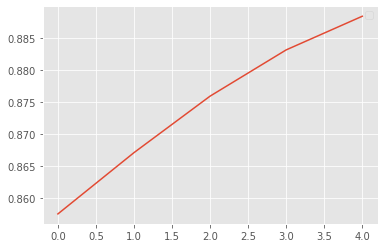

In [57]:
plt.figure()
plt.plot(losses0)
plt.plot(accuracies)
plt.legend()
plt.savefig(path + 'loss_and_accuracy.png')